# Phase 2: Exploratory Data Analysis (EDA)

**Project**: House Price Prediction and Analysis Using King County Housing Data

**Team**: Ashwin, Ashwath, Namrata Mane

**Course**: DA 591 - Final Semester Project

---

In this notebook, we will explore the cleaned dataset to:
1. Understand the distribution of features
2. Analyze relationships between features and price
3. Identify correlations
4. Select the most important features for modeling

## Step 1: Import Libraries and Load Data

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
# sns.set_style('whitegrid')
# plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [17]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_house_data.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (21436, 28)

First few rows:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,renovated,price_per_sqft,has_basement,total_rooms
0,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0,0,...,-122.303,2170,4590,2015,5,91,0,349.333333,1,6.25
1,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,-122.308,920,6380,2015,5,74,0,320.503597,1,3.75
2,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,-122.144,1870,7650,2015,5,55,0,240.641711,0,7.00
3,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,-122.343,1370,1090,2015,5,6,0,262.043796,1,4.75
4,9178601660,2015-05-14,1695000.0,5,3.00,3320,5354,2.0,0,0,...,-122.331,2330,4040,2015,5,11,0,510.542169,0,8.00


In [18]:
# Display column information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21436 non-null  int64  
 1   date            21436 non-null  object 
 2   price           21436 non-null  float64
 3   bedrooms        21436 non-null  int64  
 4   bathrooms       21436 non-null  float64
 5   sqft_living     21436 non-null  int64  
 6   sqft_lot        21436 non-null  int64  
 7   floors          21436 non-null  float64
 8   waterfront      21436 non-null  int64  
 9   view            21436 non-null  int64  
 10  condition       21436 non-null  int64  
 11  grade           21436 non-null  int64  
 12  sqft_above      21436 non-null  int64  
 13  sqft_basement   21436 non-null  int64  
 14  yr_built        21436 non-null  int64  
 15  yr_renovated    21436 non-null  int64  
 16  zipcode         21436 non-null  int64  
 17  lat       

## Step 2: Univariate Analysis - Target Variable (Price)

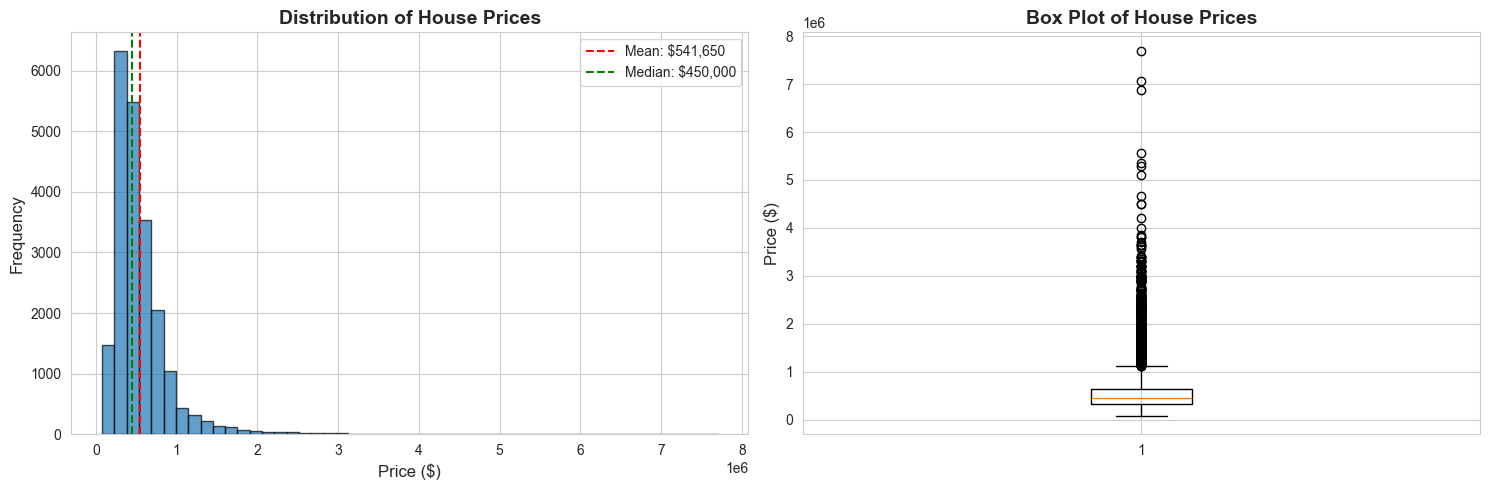


Price Statistics:
Mean: $541,649.96
Median: $450,000.00
Std Dev: $367,314.93
Min: $75,000.00
Max: $7,700,000.00


In [19]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f"Mean: ${df['price'].mean():,.0f}")
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f"Median: ${df['price'].median():,.0f}")
axes[0].legend()

# Box plot
axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Price statistics
print("\nPrice Statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Std Dev: ${df['price'].std():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")

## Step 3: Univariate Analysis - Numerical Features

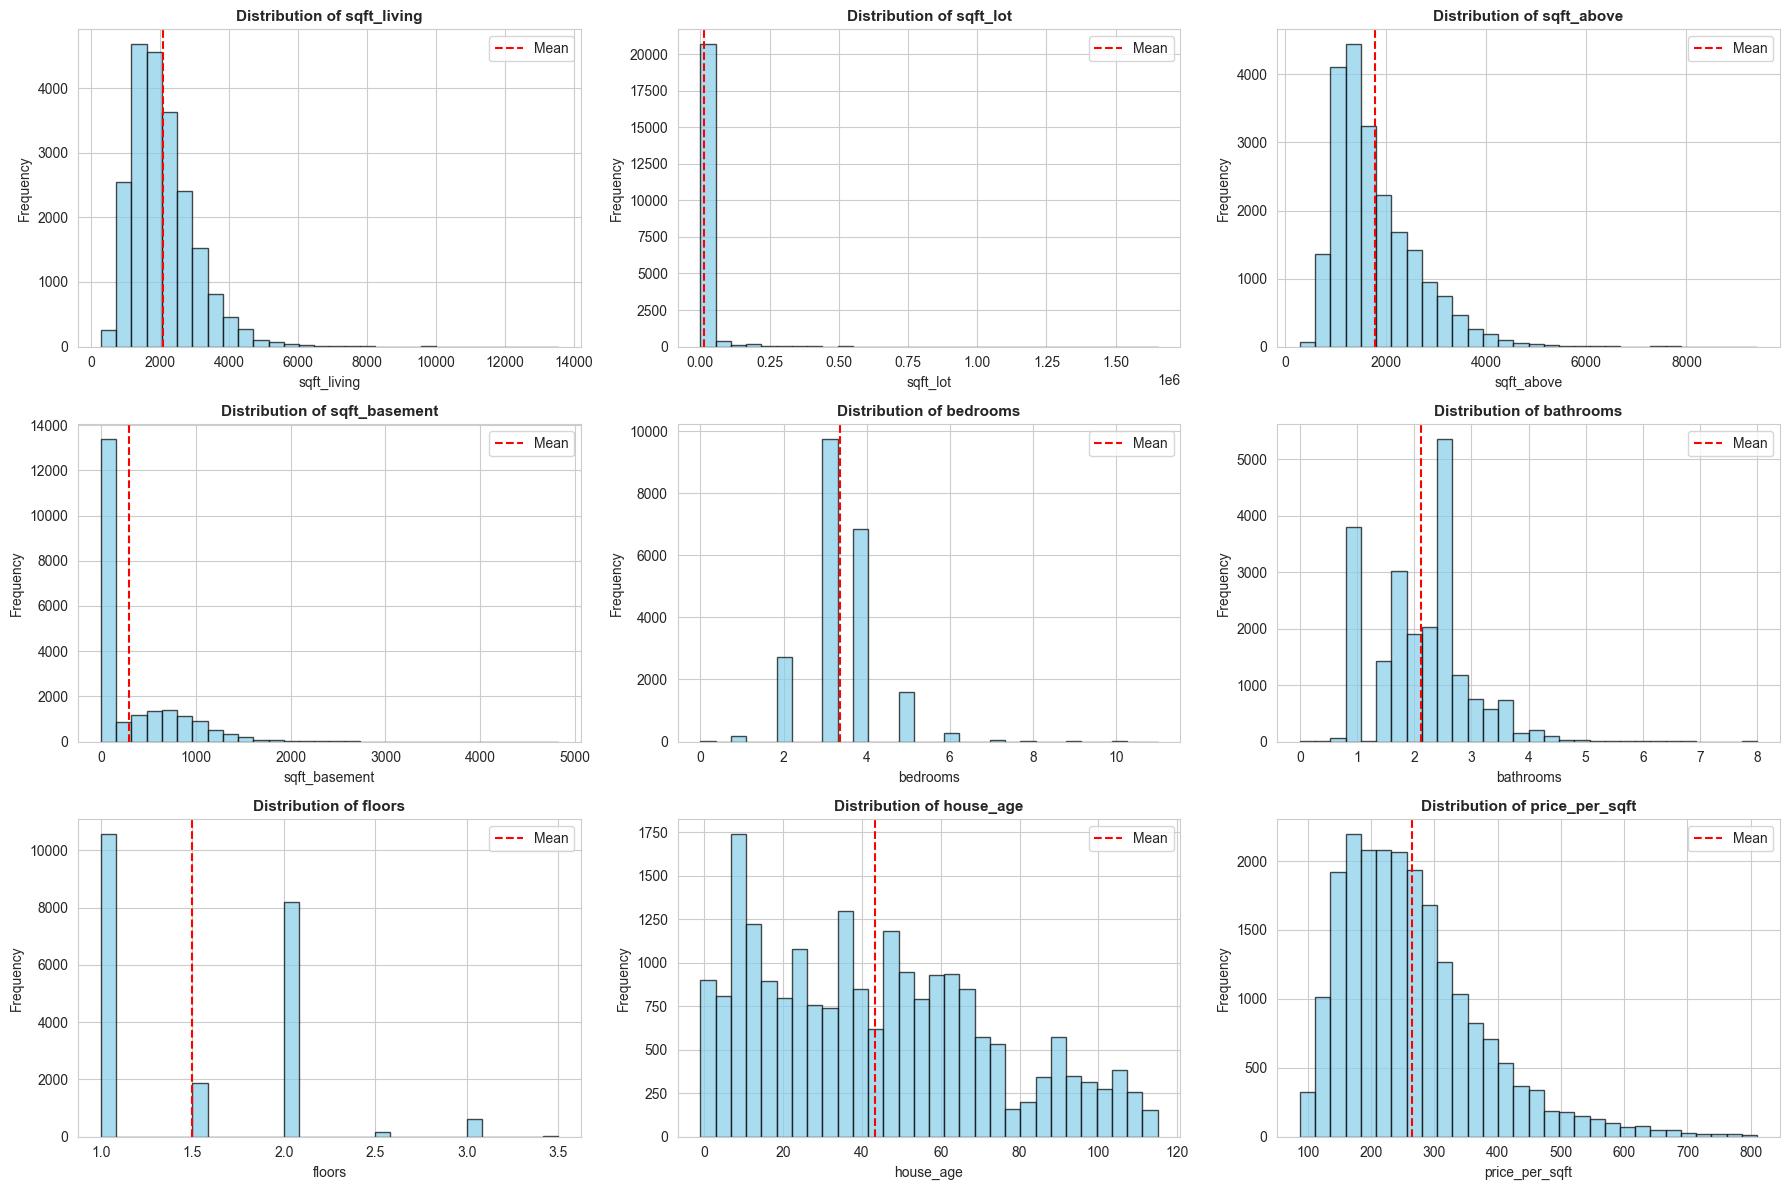

In [20]:
# Select key numerical features to visualize
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                      'bedrooms', 'bathrooms', 'floors', 'house_age', 'price_per_sqft']

# Create histograms
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## Step 4: Univariate Analysis - Categorical Features

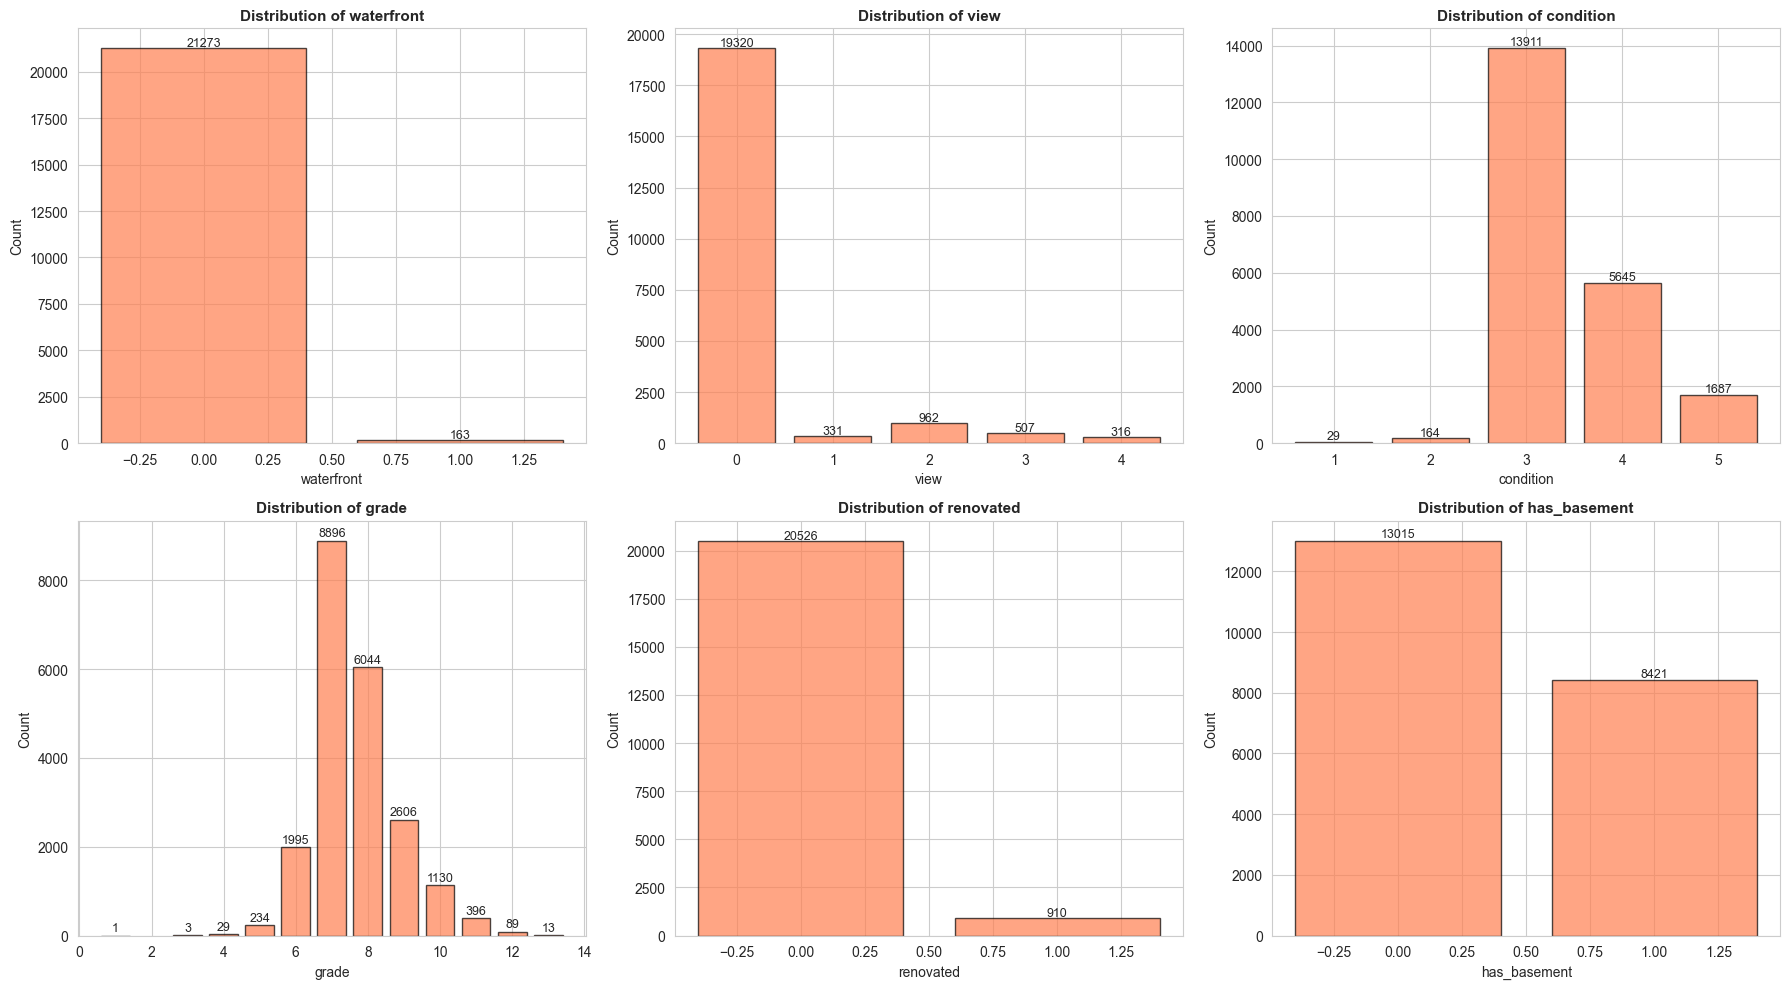

In [21]:
# Categorical features
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'renovated', 'has_basement']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7, color='coral')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(value_counts.index[i], v + 100, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Step 5: Bivariate Analysis - Numerical Features vs Price

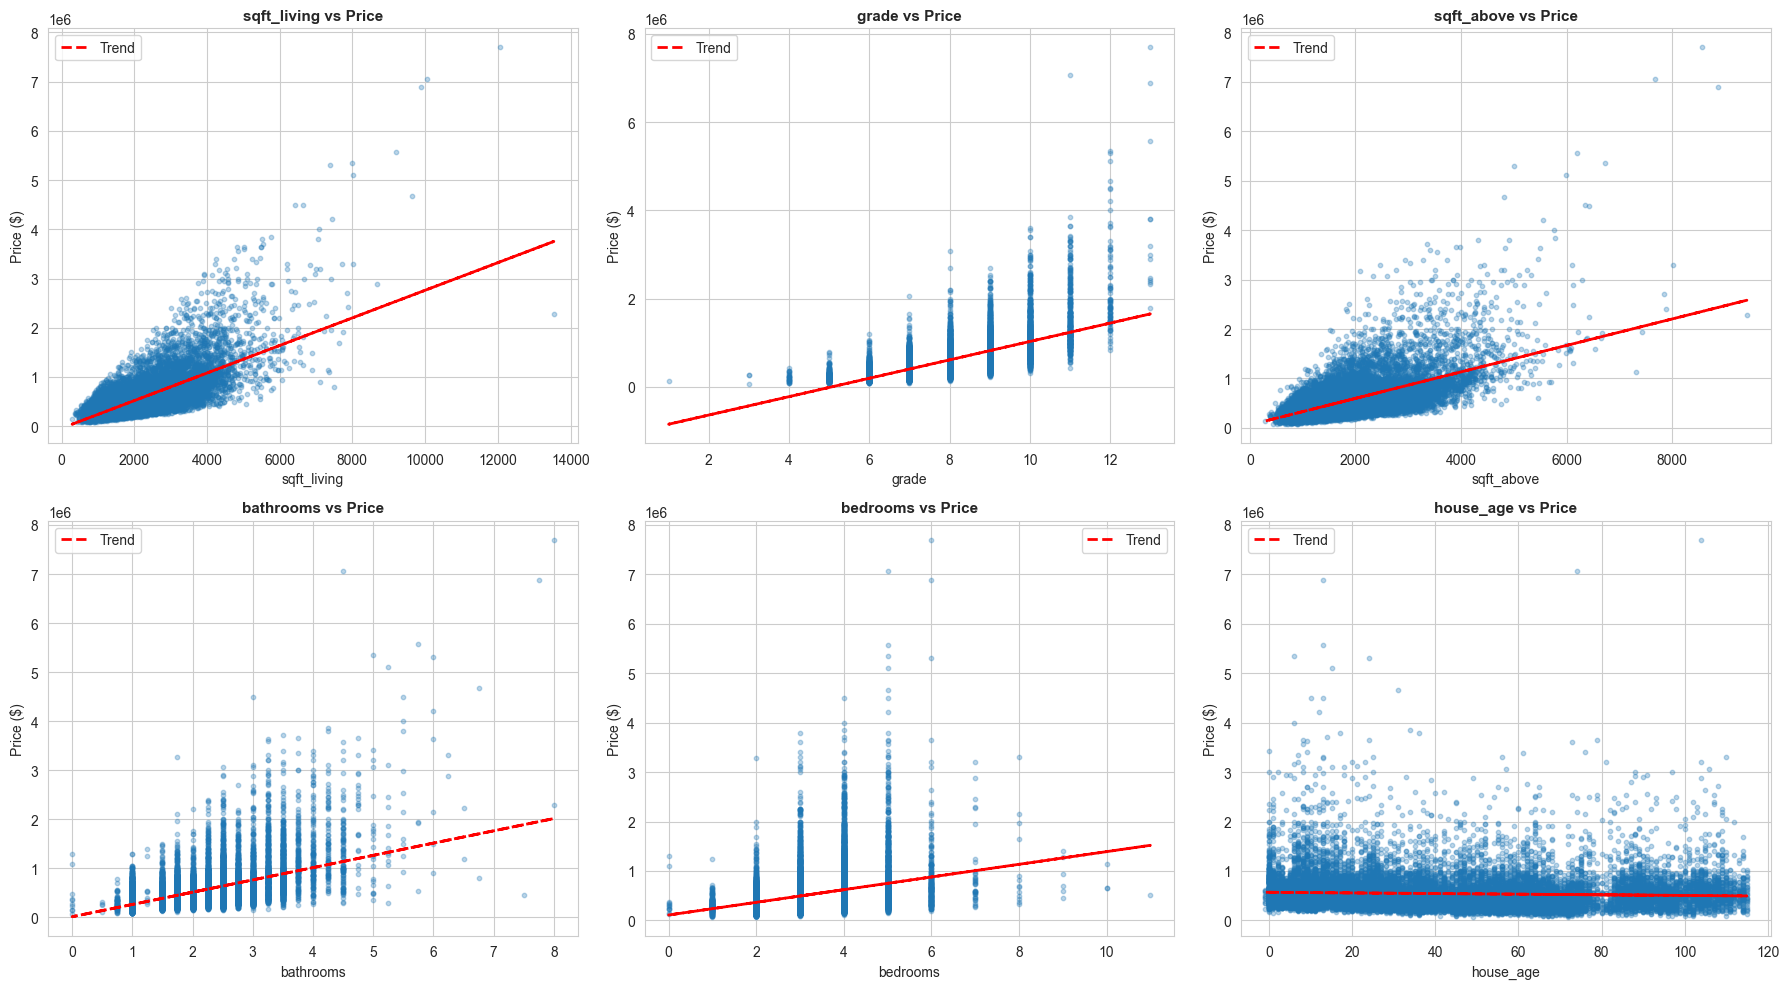

In [22]:
# Scatter plots: key features vs price
key_features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'house_age']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].scatter(df[feature], df['price'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Price ($)', fontsize=10)
    axes[idx].set_title(f'{feature} vs Price', fontsize=11, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(df[feature], df['price'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", linewidth=2, label='Trend')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## Step 6: Bivariate Analysis - Categorical Features vs Price

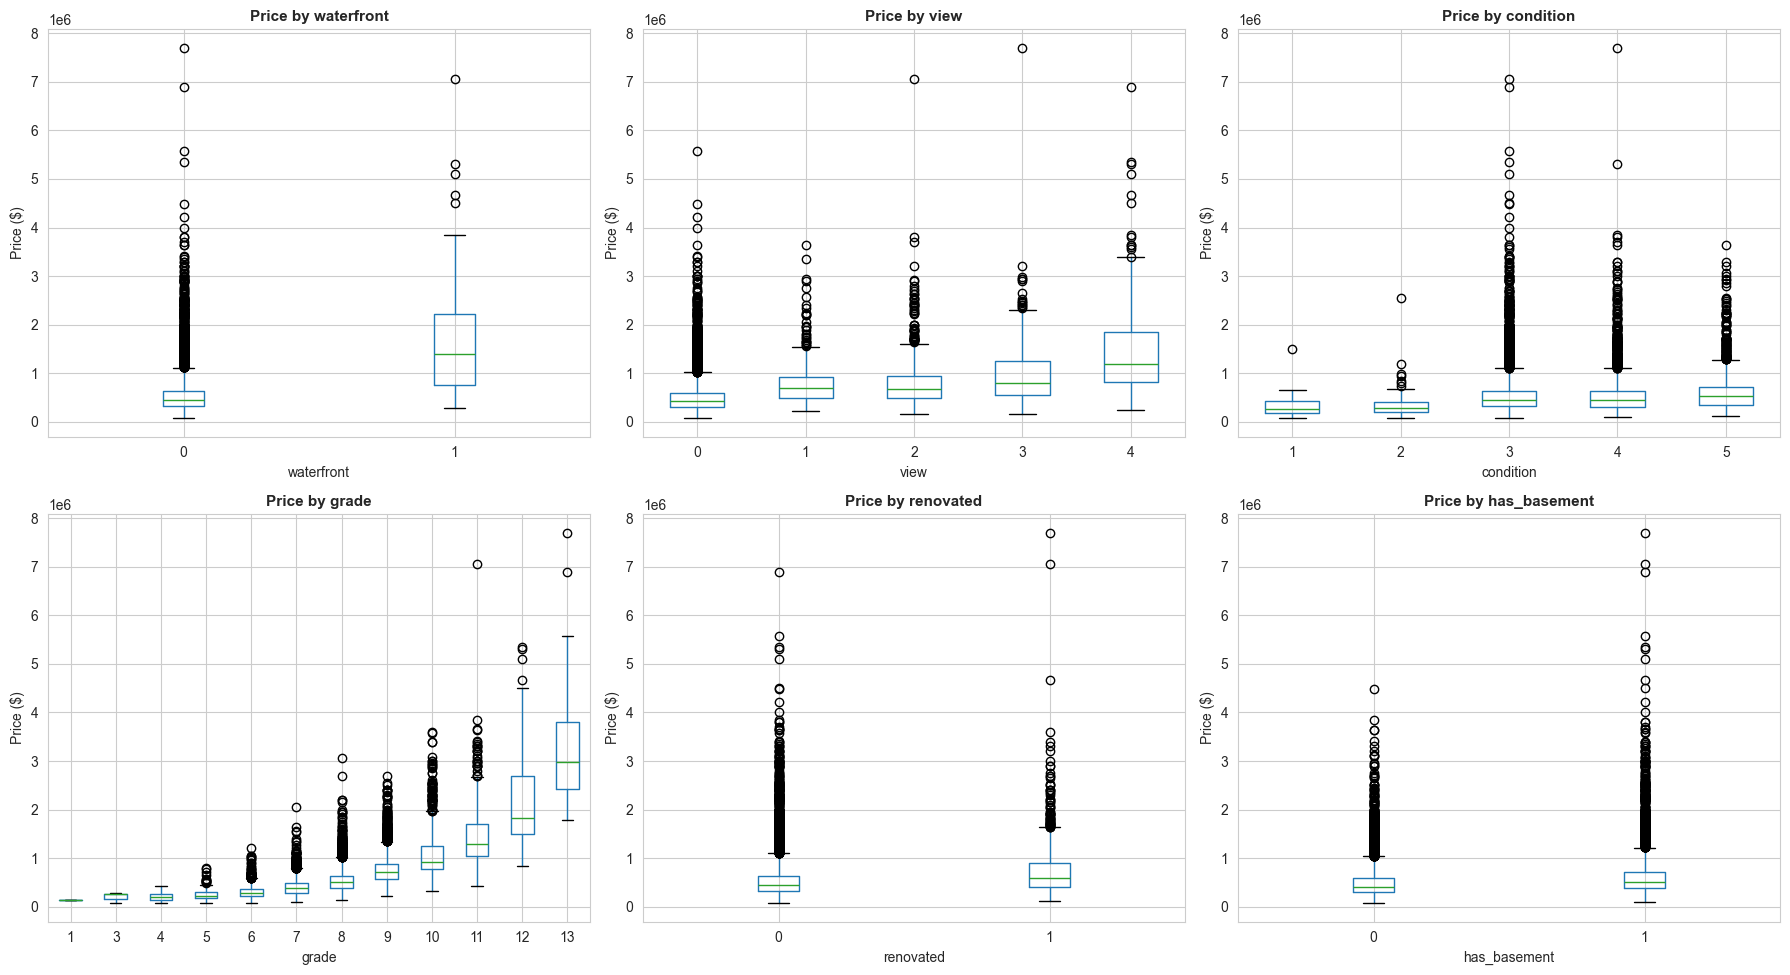

In [23]:
# Box plots: categorical features vs price
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    df.boxplot(column='price', by=feature, ax=axes[idx])
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Price ($)', fontsize=10)
    axes[idx].set_title(f'Price by {feature}', fontsize=11, fontweight='bold')
    axes[idx].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## Step 7: Correlation Analysis

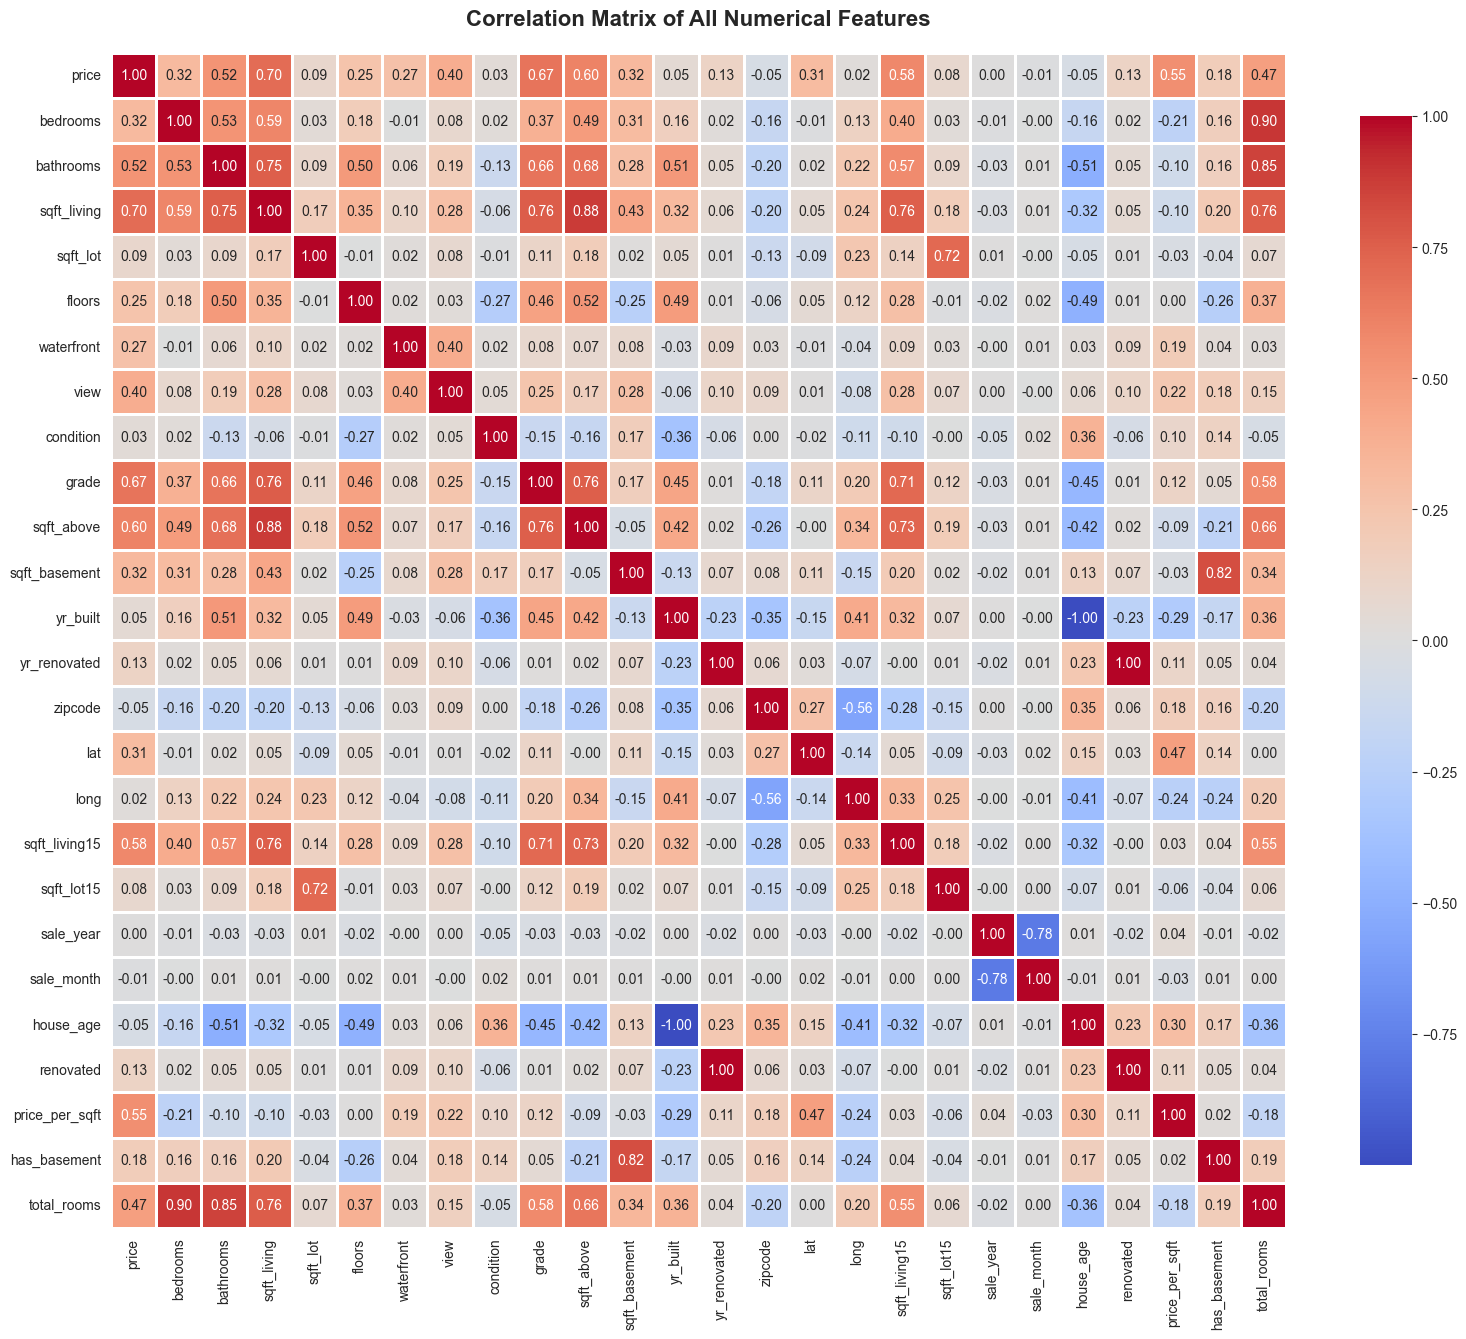

In [24]:
# Select numerical columns for correlation (exclude id and date)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['id']]

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Step 8: Feature Importance - Correlation with Price

Correlation with Price (sorted):
sqft_living         :  0.701
grade               :  0.666
sqft_above          :  0.605
sqft_living15       :  0.584
price_per_sqft      :  0.553
bathrooms           :  0.524
total_rooms         :  0.470
view                :  0.397
sqft_basement       :  0.324
bedrooms            :  0.316
lat                 :  0.307
waterfront          :  0.267
floors              :  0.255
has_basement        :  0.180
yr_renovated        :  0.127
renovated           :  0.126
sqft_lot            :  0.089
sqft_lot15          :  0.082
yr_built            :  0.051
condition           :  0.035
long                :  0.019
sale_year           :  0.001
sale_month          : -0.008
zipcode             : -0.051
house_age           : -0.051


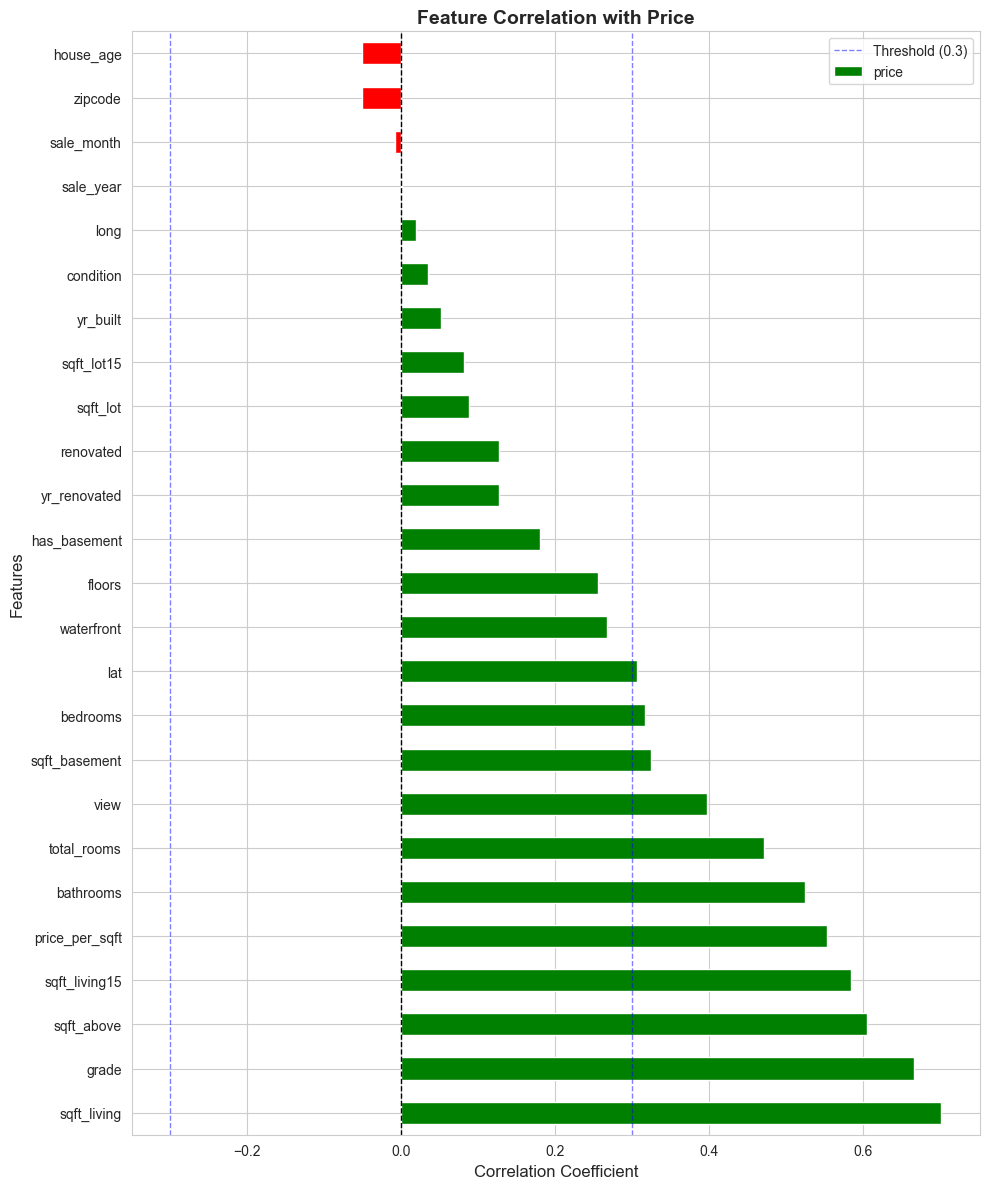

In [25]:
# Get correlation with price
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Remove price itself
price_correlation = price_correlation[price_correlation.index != 'price']

print("Correlation with Price (sorted):")
print("="*50)
for feature, corr in price_correlation.items():
    print(f"{feature:20s}: {corr:6.3f}")

# Visualize correlation with price
plt.figure(figsize=(10, 12))
price_correlation.plot(kind='barh', color=['green' if x > 0 else 'red' for x in price_correlation])
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Price', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axvline(x=0.3, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Threshold (0.3)')
plt.axvline(x=-0.3, color='blue', linestyle='--', linewidth=1, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Step 9: Identify Multicollinearity

In [26]:
# Find highly correlated feature pairs (excluding price)
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'price' and correlation_matrix.columns[j] != 'price':
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:  # Threshold for high correlation
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_value
                ))

print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
print("="*60)
if high_corr_pairs:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{feat1:20s} <-> {feat2:20s}: {corr:6.3f}")
else:
    print("No highly correlated pairs found.")

Highly Correlated Feature Pairs (|correlation| > 0.7):
yr_renovated         <-> renovated           :  1.000
yr_built             <-> house_age           : -1.000
bedrooms             <-> total_rooms         :  0.896
sqft_living          <-> sqft_above          :  0.877
bathrooms            <-> total_rooms         :  0.852
sqft_basement        <-> has_basement        :  0.819
sale_year            <-> sale_month          : -0.783
sqft_living          <-> grade               :  0.762
sqft_living          <-> total_rooms         :  0.762
sqft_living          <-> sqft_living15       :  0.756
grade                <-> sqft_above          :  0.756
bathrooms            <-> sqft_living         :  0.754
sqft_above           <-> sqft_living15       :  0.732
sqft_lot             <-> sqft_lot15          :  0.718
grade                <-> sqft_living15       :  0.713


## Step 10: Feature Selection

In [27]:
# Feature selection criteria:
# 1. Correlation with price > 0.3 (or < -0.3)
# 2. Remove redundant features (keep one from highly correlated pairs)

# Step 1: Select features with strong correlation to price
correlation_threshold = 0.3
strong_features = price_correlation[abs(price_correlation) > correlation_threshold].index.tolist()

print(f"Features with |correlation| > {correlation_threshold}:")
print("="*50)
for feature in strong_features:
    print(f"  - {feature:20s}: {price_correlation[feature]:6.3f}")

print(f"\nTotal: {len(strong_features)} features")

Features with |correlation| > 0.3:
  - sqft_living         :  0.701
  - grade               :  0.666
  - sqft_above          :  0.605
  - sqft_living15       :  0.584
  - price_per_sqft      :  0.553
  - bathrooms           :  0.524
  - total_rooms         :  0.470
  - view                :  0.397
  - sqft_basement       :  0.324
  - bedrooms            :  0.316
  - lat                 :  0.307

Total: 11 features


In [28]:
# Step 2: Handle multicollinearity
# For highly correlated pairs, keep the one with higher correlation to price

features_to_remove = set()

for feat1, feat2, corr in high_corr_pairs:
    if feat1 in strong_features and feat2 in strong_features:
        # Keep the one with higher correlation to price
        corr1 = abs(price_correlation.get(feat1, 0))
        corr2 = abs(price_correlation.get(feat2, 0))
        
        if corr1 > corr2:
            features_to_remove.add(feat2)
            print(f"Removing {feat2} (corr with price: {corr2:.3f}) - keeping {feat1} (corr: {corr1:.3f})")
        else:
            features_to_remove.add(feat1)
            print(f"Removing {feat1} (corr with price: {corr1:.3f}) - keeping {feat2} (corr: {corr2:.3f})")

# Final selected features
selected_features = [f for f in strong_features if f not in features_to_remove]

print(f"\n{'='*60}")
print(f"FINAL SELECTED FEATURES FOR MODELING ({len(selected_features)} features):")
print("="*60)
for idx, feature in enumerate(selected_features, 1):
    print(f"{idx:2d}. {feature:20s} (correlation: {price_correlation[feature]:6.3f})")

Removing bedrooms (corr with price: 0.316) - keeping total_rooms (corr: 0.470)
Removing bathrooms (corr with price: 0.524) - keeping sqft_living (corr: 0.701)
Removing total_rooms (corr with price: 0.470) - keeping bathrooms (corr: 0.524)
Removing grade (corr with price: 0.666) - keeping sqft_living (corr: 0.701)
Removing sqft_above (corr with price: 0.605) - keeping sqft_living (corr: 0.701)
Removing sqft_living15 (corr with price: 0.584) - keeping sqft_living (corr: 0.701)
Removing total_rooms (corr with price: 0.470) - keeping sqft_living (corr: 0.701)
Removing sqft_above (corr with price: 0.605) - keeping grade (corr: 0.666)
Removing sqft_living15 (corr with price: 0.584) - keeping grade (corr: 0.666)
Removing sqft_living15 (corr with price: 0.584) - keeping sqft_above (corr: 0.605)

FINAL SELECTED FEATURES FOR MODELING (5 features):
 1. sqft_living          (correlation:  0.701)
 2. price_per_sqft       (correlation:  0.553)
 3. view                 (correlation:  0.397)
 4. sqft_

## Step 11: Summary and Key Insights

In [29]:
print("="*70)
print("EDA SUMMARY AND KEY INSIGHTS")
print("="*70)

print("\n1. PRICE DISTRIBUTION:")
print(f"   - Average house price: ${df['price'].mean():,.0f}")
print(f"   - Median house price: ${df['price'].median():,.0f}")
print(f"   - Price range: ${df['price'].min():,.0f} to ${df['price'].max():,.0f}")
print(f"   - Distribution is right-skewed (mean > median)")

print("\n2. TOP 5 FEATURES CORRELATED WITH PRICE:")
for idx, (feature, corr) in enumerate(price_correlation.head(5).items(), 1):
    print(f"   {idx}. {feature:20s}: {corr:6.3f}")

print("\n3. MULTICOLLINEARITY DETECTED:")
if high_corr_pairs:
    print(f"   - Found {len(high_corr_pairs)} highly correlated feature pairs")
    print(f"   - Removed {len(features_to_remove)} redundant features")
else:
    print("   - No significant multicollinearity detected")

print("\n4. FEATURE SELECTION RESULTS:")
print(f"   - Started with {len(numerical_cols)-1} numerical features")
print(f"   - Selected {len(selected_features)} features for modeling")
print(f"   - Features removed due to low correlation: {len(numerical_cols)-1-len(strong_features)}")
print(f"   - Features removed due to multicollinearity: {len(features_to_remove)}")

print("\n5. READY FOR MODELING:")
print(f"   - Dataset shape: {df.shape}")
print(f"   - Features for Linear Regression: {len(selected_features)}")
print(f"   - Target variable: price")

print("\n" + "="*70)

EDA SUMMARY AND KEY INSIGHTS

1. PRICE DISTRIBUTION:
   - Average house price: $541,650
   - Median house price: $450,000
   - Price range: $75,000 to $7,700,000
   - Distribution is right-skewed (mean > median)

2. TOP 5 FEATURES CORRELATED WITH PRICE:
   1. sqft_living         :  0.701
   2. grade               :  0.666
   3. sqft_above          :  0.605
   4. sqft_living15       :  0.584
   5. price_per_sqft      :  0.553

3. MULTICOLLINEARITY DETECTED:
   - Found 15 highly correlated feature pairs
   - Removed 6 redundant features

4. FEATURE SELECTION RESULTS:
   - Started with 25 numerical features
   - Selected 5 features for modeling
   - Features removed due to low correlation: 14
   - Features removed due to multicollinearity: 6

5. READY FOR MODELING:
   - Dataset shape: (21436, 28)
   - Features for Linear Regression: 5
   - Target variable: price



In [30]:
# Save selected features for next phase
import json

with open('selected_features.json', 'w') as f:
    json.dump(selected_features, f, indent=2)

print("Selected features saved to 'selected_features.json'")
print("\nReady to proceed to Phase 3: Model Building!")

Selected features saved to 'selected_features.json'

Ready to proceed to Phase 3: Model Building!
